In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_trans = pd.read_csv('C:\\Users\\Greg\\Python Projects\\Fraud Detection Sklearn\\ieee-fraud-detection\\train_transaction.csv') 
test_trans = pd.read_csv('C:\\Users\\Greg\\Python Projects\\Fraud Detection Sklearn\\ieee-fraud-detection\\test_transaction.csv') 
train_id = pd.read_csv('C:\\Users\\Greg\\Python Projects\\Fraud Detection Sklearn\\ieee-fraud-detection\\train_identity.csv') 
test_id = pd.read_csv('C:\\Users\\Greg\\Python Projects\\Fraud Detection Sklearn\\ieee-fraud-detection\\test_identity.csv') 

In [3]:
#Lets start by checking out the data to see what we are working with

In [4]:
train_trans.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [6]:
#The data is split into two seperate files - transaction data & identify data
# Lets put the two together to avoid doubleing our code input

In [7]:
train = pd.merge(train_trans, train_id, on='TransactionID')
test = pd.merge(test_trans, test_id, on='TransactionID')

In [8]:
del train_trans, train_id, test_trans, test_id

In [9]:
#Now lets dive into the feature engineering
# First lets do NAN values

In [10]:
train.shape

(144233, 434)

In [11]:
pct_na = train.isna().sum().sort_values(ascending=False).divide(len(train.TransactionID)) * 100

In [12]:
pct_na

V5                100.000000
M1                100.000000
V10               100.000000
V9                100.000000
V6                100.000000
V8                100.000000
V7                100.000000
D11               100.000000
M2                100.000000
M3                100.000000
M5                100.000000
M6                100.000000
V11               100.000000
M9                100.000000
V4                100.000000
V3                100.000000
M7                100.000000
dist1             100.000000
V2                100.000000
M8                100.000000
V1                100.000000
id_24              96.708798
id_25              96.441868
id_07              96.425922
id_08              96.425922
id_21              96.423149
id_26              96.420375
id_27              96.416215
id_22              96.416215
id_23              96.416215
                     ...    
V310                0.001387
V309                0.001387
V308                0.001387
V307          

In [13]:
#Categorical features
# as per description of data the following are categorical features
# TransactionData - ProductCD, card1-card6, addr1, addr2, Permaildomain Remaildomain, M1-M9
#IdentifyData - DeviceType, DevinceInfo, id12-id38

In [14]:
train.groupby('ProductCD').TransactionID.count().T

ProductCD
C    62192
H    32908
R    37548
S    11585
Name: TransactionID, dtype: int64

In [15]:
train.ProductCD.isna().sum()

0

In [16]:
#Cards

In [17]:
train.head(2)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.0,H,2803,100.0,150.0,visa,226.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device


In [18]:
cards = train[['card1', 'card2', 'card3', 'card4', 'card5', 'card6']]
cards_test = test[['card1', 'card2', 'card3', 'card4', 'card5', 'card6']]

In [19]:
cards.head()

,card1,card2,card3,card4,card5,card6
0,4497,514.0,150.0,mastercard,102.0,credit
1,2803,100.0,150.0,visa,226.0,debit
2,16496,352.0,117.0,mastercard,134.0,credit
3,4461,375.0,185.0,mastercard,224.0,debit
4,1790,555.0,150.0,visa,226.0,debit


In [20]:
cards.card6.isna().sum()

178

In [21]:
cards.card6.unique()

array(['credit', 'debit', nan, 'charge card'], dtype=object)

In [22]:
cards.card6.fillna('unknown', inplace=True)
cards_test.card6.fillna('unknown', inplace=True)

C:\Users\Greg\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
cards.card4.isna().sum()

184

In [24]:
cards.card4.unique()

array(['mastercard', 'visa', 'american express', 'discover', nan],
      dtype=object)

In [25]:
cards.card4.fillna('unknown', inplace=True)
cards_test.card4.fillna('unknown', inplace=True)

In [26]:
cards[['card1', 'card2', 'card3', 'card5']].isna().sum().divide(len(cards.card1))*100

card1    0.000000
card2    0.625377
card3    0.119251
card5    0.662816
dtype: float64

In [27]:
#Not even 1% of data is na values,
#to keep it simple we will fill with median caregorical values

In [28]:
cards.card2.fillna(cards.card2.median(), inplace=True)
cards.card3.fillna(cards.card3.median(), inplace=True)
cards.card5.fillna(cards.card5.median(), inplace=True)

In [29]:
cards_test.card2.fillna(cards.card2.median(), inplace=True)
cards_test.card3.fillna(cards.card3.median(), inplace=True)
cards_test.card5.fillna(cards.card5.median(), inplace=True)

In [30]:
cards.isna().sum()

card1    0
card2    0
card3    0
card4    0
card5    0
card6    0
dtype: int64

In [31]:
train[['card1', 'card2', 'card3', 'card4', 'card5', 'card6']] = cards
test[['card1', 'card2', 'card3', 'card4', 'card5', 'card6']] = cards_test

In [32]:
#Addr1 and Addr2

In [33]:
address = train[['addr1', 'addr2']]
address_test = test[['addr1', 'addr2']]

In [34]:
address.isna().sum().divide(len(address.addr1))*100

addr1    41.909272
addr2    41.909272
dtype: float64

In [35]:
address.head()

,addr1,addr2
0,420.0,87.0
1,337.0,87.0
2,NaN,NaN
3,NaN,NaN
4,170.0,87.0


In [36]:
address.describe()

,addr1,addr2
count,83786.000000,83786.000000
mean,296.845058,86.198088
std,99.307179,5.645163
min,100.000000,10.000000
25%,204.000000,87.000000
50%,299.000000,87.000000
75%,330.000000,87.000000
max,540.000000,102.000000


In [37]:
address.addr1.fillna(address.addr1.median(), inplace=True)
address.addr2.fillna(address.addr2.median(), inplace=True)

address_test.addr1.fillna(address_test.addr1.median(), inplace=True)
address_test.addr2.fillna(address_test.addr2.median(), inplace=True)

In [38]:
train[['addr1', 'addr2']] = address
test[['addr1', 'addr2']] = address_test

In [39]:
#Permaildomain

In [40]:
domainP = train.P_emaildomain
domainR = train.R_emaildomain

domainP_test = test.P_emaildomain
domainR_test = test.R_emaildomain

In [41]:
domainP.isna().sum()

13391

In [42]:
domainR.isna().sum()

13150

In [43]:
domainP.unique()

array(['gmail.com', 'anonymous.com', 'hotmail.com', 'aol.com',
       'yahoo.com', nan, 'outlook.com', 'charter.net', 'comcast.net',
       'optonline.net', 'embarqmail.com', 'live.com.mx', 'icloud.com',
       'juno.com', 'att.net', 'msn.com', 'yahoo.com.mx', 'cox.net',
       'servicios-ta.com', 'me.com', 'hotmail.es', 'live.com',
       'verizon.net', 'bellsouth.net', 'sbcglobal.net', 'gmx.de',
       'mail.com', 'frontier.com', 'frontiernet.net', 'outlook.es',
       'suddenlink.net', 'roadrunner.com', 'mac.com', 'earthlink.net',
       'web.de', 'twc.com', 'ymail.com', 'yahoo.fr', 'yahoo.de',
       'windstream.net', 'gmail', 'rocketmail.com', 'cfl.rr.com',
       'yahoo.es', 'live.fr', 'q.com', 'prodigy.net.mx', 'yahoo.co.uk',
       'hotmail.fr', 'hotmail.de', 'netzero.net', 'cableone.net',
       'aim.com', 'ptd.net', 'centurylink.net', 'hotmail.co.uk',
       'netzero.com', 'sc.rr.com', 'yahoo.co.jp', 'protonmail.com'],
      dtype=object)

In [44]:
domainR.unique()

array([nan, 'gmail.com', 'hotmail.com', 'outlook.com', 'anonymous.com',
       'charter.net', 'comcast.net', 'live.com.mx', 'icloud.com',
       'yahoo.com', 'aol.com', 'juno.com', 'att.net', 'verizon.net',
       'yahoo.com.mx', 'bellsouth.net', 'servicios-ta.com', 'ymail.com',
       'hotmail.es', 'msn.com', 'optonline.net', 'live.com', 'gmx.de',
       'aim.com', 'mail.com', 'me.com', 'outlook.es', 'cox.net',
       'earthlink.net', 'embarqmail.com', 'web.de', 'sbcglobal.net',
       'scranton.edu', 'mac.com', 'twc.com', 'roadrunner.com', 'yahoo.fr',
       'yahoo.de', 'yahoo.es', 'frontiernet.net', 'gmail', 'live.fr',
       'q.com', 'prodigy.net.mx', 'yahoo.co.uk', 'windstream.net',
       'suddenlink.net', 'hotmail.fr', 'ptd.net', 'hotmail.de',
       'frontier.com', 'cfl.rr.com', 'hotmail.co.uk', 'netzero.com',
       'netzero.net', 'yahoo.co.jp', 'rocketmail.com', 'centurylink.net',
       'protonmail.com', 'cableone.net', 'sc.rr.com'], dtype=object)

In [45]:
domainP.fillna('unknown', inplace=True)
domainR.fillna('unknown', inplace=True)

domainP_test.fillna('unknown', inplace=True)
domainR_test.fillna('unknown', inplace=True)

In [46]:
train[['P_emaildomain']] = domainP
train[['R_emaildomain']] = domainR

test[['P_emaildomain']] = domainP_test
test[['R_emaildomain']] = domainR_test


In [47]:
#M1-M9 -
#names on cards, addresses

In [48]:
TheMs = train[['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M6', 'M7', 'M8', 'M9']]
TheMs_test = test[['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M6', 'M7', 'M8', 'M9']]

In [49]:
TheMs.head()

,M1,M2,M3,M4,M5,M6,M6,M7,M8,M9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,M0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,M0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
TheMs.isna().sum()

M1    144233
M2    144233
M3    144233
M4     83402
M5    144233
M6    144233
M6    144233
M7    144233
M8    144233
M9    144233
dtype: int64

In [51]:
TheMs.M1.unique()

array([nan], dtype=object)

In [52]:
TheMs.M4.unique()

array([nan, 'M0', 'M2', 'M1'], dtype=object)

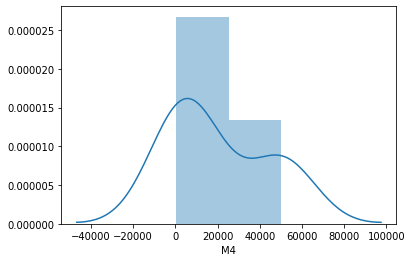

In [53]:
sns.distplot(TheMs.M4.value_counts())

In [54]:
TheMs.M4.value_counts()

M2    50300
M0    10109
M1      422
Name: M4, dtype: int64

In [55]:
TheMs.M4.isna().sum()

83402

In [56]:
#I think the best we can do here is eliminate all M columns except for M4. 
#The majority of M4 is NaN but we can pass them through as median values (M2)

In [57]:
train.drop(columns=['M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9'], inplace=True)
test.drop(columns=['M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9'], inplace=True)

In [58]:
train.M4.fillna('M2', inplace=True)
test.M4.fillna('M2', inplace=True)

In [59]:
train.M4.value_counts()

M2    133702
M0     10109
M1       422
Name: M4, dtype: int64

In [60]:
#DeviceType

In [61]:
train.DeviceType.value_counts()

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64

In [62]:
train.DeviceType.isna().sum()

3423

In [63]:
train.DeviceType.fillna('unknown', inplace=True)
test.DeviceType.fillna('unknown', inplace=True)

In [64]:
#DeviceInfo

In [65]:
train.DeviceInfo.value_counts()

Windows                           47722
iOS Device                        19782
MacOS                             12573
Trident/7.0                        7440
rv:11.0                            1901
rv:57.0                             962
SM-J700M Build/MMB29K               549
SM-G610M Build/MMB29K               461
SM-G531H Build/LMY48B               410
rv:59.0                             362
SM-G935F Build/NRD90M               334
SM-G955U Build/NRD90M               328
SM-G532M Build/MMB29T               316
ALE-L23 Build/HuaweiALE-L23         312
SM-G950U Build/NRD90M               290
SM-G930V Build/NRD90M               274
rv:58.0                             269
rv:52.0                             256
SAMSUNG                             235
SM-G950F Build/NRD90M               225
Moto G (4) Build/NPJ25.93-14.7      219
SM-N950U Build/NMF26X               209
SM-A300H Build/LRX22G               203
hi6210sft Build/MRA58K              190
SM-J730GM Build/NRD90M              184


In [66]:
train.DeviceInfo.isna().sum()

25567

In [67]:
train.DeviceInfo.fillna('unknown', inplace=True)
test.DeviceInfo.fillna('unknown', inplace=True)

In [68]:
#id12-id38

In [69]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,0,86555,16.495,C,4461,375.0,185.0,mastercard,224.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,unknown
4,2987016,0,86620,30.000,H,1790,555.0,150.0,visa,226.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [70]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663586,18404013,6.271,C,15885,545.0,185.0,visa,138.0,debit,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,18404055,50.000,S,2453,399.0,150.0,american express,137.0,credit,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,18404235,37.318,C,15885,545.0,185.0,visa,138.0,debit,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,18404315,6.271,C,15885,545.0,185.0,visa,138.0,debit,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,18404359,52.258,C,9633,130.0,185.0,visa,138.0,debit,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [71]:
idcols = train.columns[-29:-2]
idcols_test = test.columns[-29:-2]

In [72]:
iddata = train[idcols]
iddata_test = test[idcols_test]

In [73]:
iddata.isna().sum().divide(int(len(iddata.id_12)))*100

id_12     0.000000
id_13    11.726165
id_14    44.503685
id_15     2.251912
id_16    10.325654
id_17     3.372321
id_18    68.722137
id_19     3.407681
id_20     3.447200
id_21    96.423149
id_22    96.416215
id_23    96.416215
id_24    96.708798
id_25    96.441868
id_26    96.420375
id_27    96.416215
id_28     2.256765
id_29     2.256765
id_30    46.222432
id_31     2.739318
id_32    46.207872
id_33    49.187079
id_34    46.056034
id_35     2.251912
id_36     2.251912
id_37     2.251912
id_38     2.251912
dtype: float64

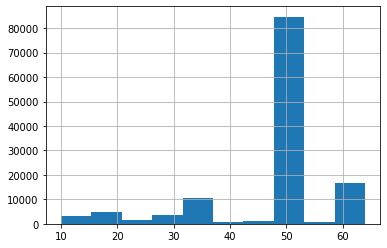

In [74]:
iddata.id_13.hist()

In [75]:
idcat_cols = []
idnum_cols = []
for col in iddata.columns:
    if iddata[col].dtype == 'object':
        idcat_cols.append(col)
    else:
        idnum_cols.append(col)

In [76]:
len(idcat_cols) + len(idnum_cols)

27

In [77]:
len(iddata.columns)

27

In [78]:
for cols in idcat_cols:
    train[cols].fillna('unknown', inplace=True)
    test[cols].fillna('unknown', inplace=True)

In [79]:
for cols in idnum_cols:
    train[cols].fillna(0, inplace=True)
    test[cols].fillna(0, inplace=True)

In [80]:
train.id_13.isna().sum()

0

In [81]:
#Numerical columns

In [82]:
train.isna().sum().sort_values(ascending=False).head()

V4     144233
V1     144233
V11    144233
V10    144233
V9     144233
dtype: int64

In [83]:
#The Vs
#Vesta engineering rich features
#include ranking, counting, and other relations

In [84]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,...,chrome 62.0,0.0,unknown,unknown,F,F,T,T,desktop,Windows
3,2987011,0,86555,16.495,C,4461,375.0,185.0,mastercard,224.0,...,chrome 62.0,0.0,unknown,unknown,F,F,T,T,desktop,unknown
4,2987016,0,86620,30.000,H,1790,555.0,150.0,visa,226.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [85]:
v_cols = [c for c in train if c[0] == 'V']

In [86]:
v_data = train[v_cols]

In [87]:
v_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
v_data.isna().sum()

V1      144233
V2      144233
V3      144233
V4      144233
V5      144233
V6      144233
V7      144233
V8      144233
V9      144233
V10     144233
V11     144233
V12      75052
V13      75052
V14      75052
V15      75052
V16      75052
V17      75052
V18      75052
V19      75052
V20      75052
V21      75052
V22      75052
V23      75052
V24      75052
V25      75052
V26      75052
V27      75052
V28      75052
V29      75052
V30      75052
         ...  
V310         2
V311         2
V312         2
V313       218
V314       218
V315       218
V316         2
V317         2
V318         2
V319         2
V320         2
V321         2
V322     62192
V323     62192
V324     62192
V325     62192
V326     62192
V327     62192
V328     62192
V329     62192
V330     62192
V331     62192
V332     62192
V333     62192
V334     62192
V335     62192
V336     62192
V337     62192
V338     62192
V339     62192
Length: 339, dtype: int64

In [89]:
drop = v_data.columns[:11]

In [90]:
for cols in drop:
    train.drop(columns=cols, inplace=True)
    test.drop(columns=cols, inplace=True)
    v_data.drop(columns=cols, inplace=True)

C:\Users\Greg\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [91]:
pd.options.display.max_columns=None

In [92]:
v_data.columns

Index(['V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=328)

In [93]:
for cols in v_data.columns:
    train[cols].fillna(0, inplace=True)
    test[cols].fillna(0, inplace=True)

In [94]:
train.isna().sum().sort_values(ascending=False).head(10)

dist1    144233
D11      144233
id_07    139078
id_08    139078
D3       115174
D2       113117
D5       111158
D7       108093
dist2    106640
D12       85324
dtype: int64

In [95]:
#next d columns
#decription says these are time deltas

In [96]:
train.head(2)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M4,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,unknown,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,18.0,140.0,0.0,0.0,0.0,0.0,1803.0,49.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,15557.990234,169690.796875,0.0,0.0,0.0,515.0,5155.0,2840.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,0.0,-480.0,New,NotFound,166.0,0.0,542.0,144.0,0.0,0.0,unknown,0.0,0.0,0.0,unknown,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.0,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,NaN,NaN,anonymous.com,unknown,1.0,1.0,0.0,0.0,0

In [97]:
d_cols = [c for c in train if c[0] == 'D']

In [98]:
d_data = train[d_cols]

In [99]:
d_data.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,DeviceType,DeviceInfo
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mobile,SAMSUNG SM-G892A Build/NRD90M
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mobile,iOS Device
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,desktop,Windows
3,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,desktop,unknown
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,desktop,MacOS


In [100]:
d_data.drop(columns=['DeviceType', 'DeviceInfo'], inplace=True)

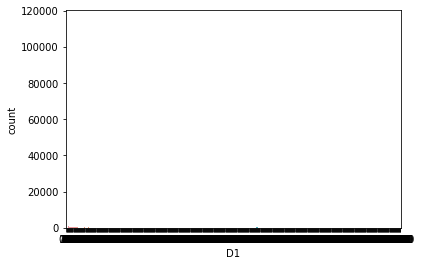

In [101]:
sns.countplot(d_data.D1)

In [102]:
d_data.D1.unique()[:10]

array([  0.,   1., 542.,  66.,  21.,  94., 339.,  19.,  17., 242.])

In [103]:
for cols in d_cols:
    train[cols].fillna(0, inplace=True)
    test[cols].fillna(0, inplace=True)

In [104]:
train.D1.isna().sum()

0

In [105]:
train.isna().sum().sort_values(ascending=False)

dist1            144233
id_07            139078
id_08            139078
dist2            106640
id_04             77909
id_03             77909
id_10             69307
id_09             69307
id_05              7368
id_06              7368
id_02              3361
id_11              3255
V108                  0
V96                   0
V114                  0
V113                  0
V112                  0
V111                  0
V93                   0
V94                   0
V95                   0
V97                   0
V107                  0
V98                   0
V99                   0
V100                  0
V102                  0
V110                  0
V109                  0
V103                  0
                  ...  
V262                  0
V263                  0
V264                  0
V265                  0
V244                  0
V242                  0
V219                  0
V241                  0
V220                  0
V221                  0
V222            

In [106]:
#id1-id11

In [107]:
train.isna().sum().sort_values(ascending=False)[:12]

dist1    144233
id_07    139078
id_08    139078
dist2    106640
id_04     77909
id_03     77909
id_10     69307
id_09     69307
id_05      7368
id_06      7368
id_02      3361
id_11      3255
dtype: int64

In [108]:
id_cols = [c for c in train if c[0] == 'i']

In [109]:
id_cols = id_cols[2:13]

In [110]:
for col in id_cols:
    train[col].fillna(0, inplace=True)
    test[col].fillna(0, inplace=True)

In [111]:
train.id_12.isna().sum()

0

In [112]:
train.isna().sum().sort_values(ascending=False)[:5]

dist1         144233
dist2         106640
DeviceInfo         0
V97                0
V98                0
dtype: int64

In [113]:
train.dist1.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: dist1, dtype: float64

In [114]:
train.dist1.unique()

array([nan])

In [115]:
train.drop(columns=['dist1'], inplace=True)
test.drop(columns=['dist1'], inplace=True)

In [116]:
train.dist2.unique()

array([  nan,   30.,   98., ..., 1467., 1172., 2296.])

In [117]:
train.dist2.isna().sum()/(len(train.dist2))

0.7393592312438901

In [118]:
train.drop(columns='dist2', inplace=True)
test.drop(columns='dist2', inplace=True)

In [119]:
train.isna().sum().sort_values(ascending=False)[:3]

DeviceInfo    0
V107          0
V97           0
dtype: int64

In [120]:
test.isna().sum().sort_values(ascending=False)[:10]

C13    1499
C8        3
C6        3
C9        3
C4        3
C3        3
C2        3
C1        3
C10       3
C11       3
dtype: int64

In [121]:
test.C13.head()

0     0.0
1    57.0
2     1.0
3     2.0
4    10.0
Name: C13, dtype: float64

In [122]:
test.C13.describe()

count    140408.000000
mean          6.080978
std          40.305785
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         919.000000
Name: C13, dtype: float64

In [123]:
test.C13.fillna(test.C13.median(), inplace=True)

In [124]:
test.C1.isna().sort_values(ascending=False)[:3]

79677    True
79676    True
79672    True
Name: C1, dtype: bool

In [125]:
test.iloc[79677]

TransactionID            4032489
TransactionDT           31002164
TransactionAmt                50
ProductCD                      H
card1                      15146
card2                        311
card3                        185
card4                       visa
card5                        102
card6                     credit
addr1                        296
addr2                         60
P_emaildomain          gmail.com
R_emaildomain          gmail.com
C1                           NaN
C2                           NaN
C3                           NaN
C4                           NaN
C5                           NaN
C6                           NaN
C7                           NaN
C8                           NaN
C9                           NaN
C10                          NaN
C11                          NaN
C12                          NaN
C13                            1
C14                          NaN
D1                             0
D2                             0
          

In [126]:
len(test.C1)

141907

In [127]:
test.drop([79672, 79676, 79677], axis=0, inplace=True)

In [128]:
len(test.C1)

141904

In [129]:
test.isna().sum().sort_values(ascending=False)[:5]

DeviceInfo    0
V108          0
V98           0
V99           0
V100          0
dtype: int64

In [130]:
#No More NaN values!

In [131]:
#Lets make sure everything else looks correct

In [132]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M4,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com,unknown,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,18.0,140.0,0.0,0.0,0.0,0.0,1803.0,49.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,15557.990234,169690.796875,0.0,0.0,0.0,515.0,5155.0,2840.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70787.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,0.0,-480.0,New,NotFound,166.0,0.0,542.0,144.0,0.0,0.0,unknown,0.0,0.0,0.0,unknown,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_stat

In [133]:
#The model will not accept string values..we need to change the strings into numbers

In [134]:
train.id_27.dtype

dtype('O')

In [135]:
catcols = []
for cols in train.columns:
    if train[cols].dtype == 'O':
        catcols.append(cols)

In [136]:
#initial labeling process

In [137]:
from sklearn.preprocessing import LabelEncoder

In [138]:
LabelEncoder().fit_transform(train.id_27)[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [139]:
for cols in catcols:
    train[cols] = LabelEncoder().fit_transform(train[cols])
    test[cols] = LabelEncoder().fit_transform(test[cols])

In [140]:
#Secondary labeling process

Now lets perform regression

In [141]:
## First, I need to seperate y from train

In [142]:
train_y = np.array(train['isFraud'])

In [143]:
train.drop(columns ='isFraud', inplace=True)

In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
model = LogisticRegression().fit(train, train_y)

C:\Users\Greg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [146]:
pred = model.predict(test)

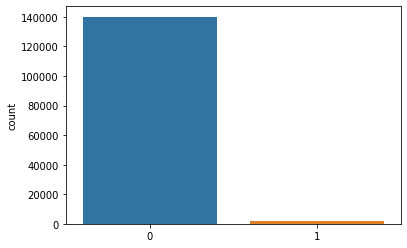

In [147]:
sns.countplot(pred)

In [148]:
model.predict_proba(test).mean()

0.5

In [149]:
#50% average confidence for model.
#Not an ideal score.
#More work needed within feature engineering to maximize score
#Further work is outside the scope of this notebook